In [212]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

# set pd options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [213]:
df_arith = pd.read_csv("../dfs/2024-06-19_19-25-59.csv")
df_boolean = pd.read_csv("../dfs/2024-06-20_12-00-00.csv")

# make df_boolean the same size as df_arith
df_boolean = df_boolean[:39]
df_arith = df_arith[:39]

df_boolean.head()

,Unnamed: 0,ref_img,other_img,result,expected_result,cos_dist_np,cos_dist_sfe,total_time,sfe_time,extraction_time,share_bytes_setup_phase_total,share_bytes_setup_phase_client,share_bytes_setup_phase_server,share_bytes_online_phase_client,server.Command being timed,server.User time (seconds),server.System time (seconds),server.Percent of CPU this job got,server.Elapsed (wall clock) time (h:mm:ss or m:ss),server.Average shared text size (kbytes),server.Average unshared data size (kbytes),server.Average stack size (kbytes),server.Average total size (kbytes),server.Maximum resident set size (kbytes),server.Average resident set size (kbytes),server.Major (requiring I/O) page faults,server.Minor (reclaiming a frame) page faults,server.Voluntary context switches,server.Involuntary context switches,server.Swaps,server.File system inputs,server.File system outputs,server.Socket messages sent,server.Socket messages received,server.Signals delivered,server.Page size (bytes),server.Exit status,client.Command being timed,client.User time (seconds),client.System time (seconds),client.Percent of CPU this job got,client.Elapsed (wall clock) time (h:mm:ss or m:ss),client.Average shared text size (kbytes),client.Average unshared data size (kbytes),client.Average stack size (kbytes),client.Average total size (kbytes),client.Maximum resident set size (kbytes),client.Average resident set size (kbytes),client.Major (requiring I/O) page faults,client.Minor (reclaiming a frame) page faults,client.Voluntary context switches,client.Involuntary context switches,client.Swaps,client.File system inputs,client.File system outputs,client.Socket messages sent,client.Socket messages received,client.Signals delivered,client.Page size (bytes),client.Exit status,energy_client,energy_server,server.hardware.aes.performance,server.hardware.rtt,server.hardware.throughput,server.online_time.bool.local_gates,server.online_time.bool.interactive_gates,server.online_time.bool.layer_finish,server.online_time.yao.local_gates,server.online_time.yao.interactive_gates,server.online_time.yao.layer_finish,server.online_time.yao_rev.local_gates,server.online_time.yao_rev.interactive_gates,server.online_time.yao_rev.layer_finish,server.online_time.arith.local_gates,server.online_time.arith.interactive_gates,server.online_time.arith.layer_finish,server.online_time.splut.local_gates,server.online_time.splut.interactive_gates,server.online_time.splut.layer_finish,server.online_time.communication,server.complexities.boolean_sharing.ands,server.complexities.boolean_sharing.depth,server.complexities.total_vec_and,server.complexities.total_non_vec_and,server.complexities.xor_vals,server.complexities.gates,server.complexities.comb_gates,server.complexities.combstruct_gates,server.complexities.perm_gates,server.complexities.subset_gates,server.complexities.split_gates,server.complexities.yao.ands,server.complexities.yao.depth,server.complexities.reverse_yao.ands,server.complexities.reverse_yao.depth,server.complexities.arithmetic_sharing.muls,server.complexities.arithmetic_sharing.depth,server.complexities.sp_lut_sharing.ot_gates_total,server.complexities.sp_lut_sharing.depth,server.complexities.total_nr_of_gates,server.complexities.total_depth,server.timings.total,server.timings.init,server.timings.circuitgen,server.timings.network,server.timings.baseots,server.timings.setup,server.timings.otextension,server.timings.garbling,server.timings.online,server.communication.total.sent,server.communication.total.received,server.communication.base_ots.sent,server.communication.base_ots.received,server.communication.setup.sent,server.communication.setup.received,server.communication.otextension.sent,server.communication.otextension.received,server.communication.garbling.sent,server.communication.garbling.received,server.communication.online.sent,server.communication.online.received,server.cos_dist_ver,server.cos_dist_sfe,client.hardware.aes.performance,client.hardware.rtt,client.hardware.throughput

In [214]:
df_arith.head()

,Unnamed: 0,ref_img,other_img,result,expected_result,cos_dist_np,cos_dist_sfe,total_time,sfe_time,extraction_time,share_bytes_setup_phase_total,share_bytes_setup_phase_client,share_bytes_setup_phase_server,share_bytes_online_phase_client,server.Command being timed,server.User time (seconds),server.System time (seconds),server.Percent of CPU this job got,server.Elapsed (wall clock) time (h:mm:ss or m:ss),server.Average shared text size (kbytes),server.Average unshared data size (kbytes),server.Average stack size (kbytes),server.Average total size (kbytes),server.Maximum resident set size (kbytes),server.Average resident set size (kbytes),server.Major (requiring I/O) page faults,server.Minor (reclaiming a frame) page faults,server.Voluntary context switches,server.Involuntary context switches,server.Swaps,server.File system inputs,server.File system outputs,server.Socket messages sent,server.Socket messages received,server.Signals delivered,server.Page size (bytes),server.Exit status,client.Command being timed,client.User time (seconds),client.System time (seconds),client.Percent of CPU this job got,client.Elapsed (wall clock) time (h:mm:ss or m:ss),client.Average shared text size (kbytes),client.Average unshared data size (kbytes),client.Average stack size (kbytes),client.Average total size (kbytes),client.Maximum resident set size (kbytes),client.Average resident set size (kbytes),client.Major (requiring I/O) page faults,client.Minor (reclaiming a frame) page faults,client.Voluntary context switches,client.Involuntary context switches,client.Swaps,client.File system inputs,client.File system outputs,client.Socket messages sent,client.Socket messages received,client.Signals delivered,client.Page size (bytes),client.Exit status,energy_client,energy_server,server.hardware.aes.performance,server.hardware.rtt,server.hardware.throughput,server.online_time.bool.local_gates,server.online_time.bool.interactive_gates,server.online_time.bool.layer_finish,server.online_time.yao.local_gates,server.online_time.yao.interactive_gates,server.online_time.yao.layer_finish,server.online_time.yao_rev.local_gates,server.online_time.yao_rev.interactive_gates,server.online_time.yao_rev.layer_finish,server.online_time.arith.local_gates,server.online_time.arith.interactive_gates,server.online_time.arith.layer_finish,server.online_time.splut.local_gates,server.online_time.splut.interactive_gates,server.online_time.splut.layer_finish,server.online_time.communication,server.complexities.boolean_sharing.ands,server.complexities.boolean_sharing.depth,server.complexities.total_vec_and,server.complexities.total_non_vec_and,server.complexities.xor_vals,server.complexities.gates,server.complexities.comb_gates,server.complexities.combstruct_gates,server.complexities.perm_gates,server.complexities.subset_gates,server.complexities.split_gates,server.complexities.yao.ands,server.complexities.yao.depth,server.complexities.reverse_yao.ands,server.complexities.reverse_yao.depth,server.complexities.arithmetic_sharing.muls,server.complexities.arithmetic_sharing.depth,server.complexities.sp_lut_sharing.ot_gates_total,server.complexities.sp_lut_sharing.depth,server.complexities.total_nr_of_gates,server.complexities.total_depth,server.timings.total,server.timings.init,server.timings.circuitgen,server.timings.network,server.timings.baseots,server.timings.setup,server.timings.otextension,server.timings.garbling,server.timings.online,server.communication.total.sent,server.communication.total.received,server.communication.base_ots.sent,server.communication.base_ots.received,server.communication.setup.sent,server.communication.setup.received,server.communication.otextension.sent,server.communication.otextension.received,server.communication.garbling.sent,server.communication.garbling.received,server.communication.online.sent,server.communication.online.received,server.cos_dist_ver,server.cos_dist_sfe,client.hardware.aes.performance,client.hardware.rtt,client.hardware.throughput

Text(0.5, 0, 'Configuration')

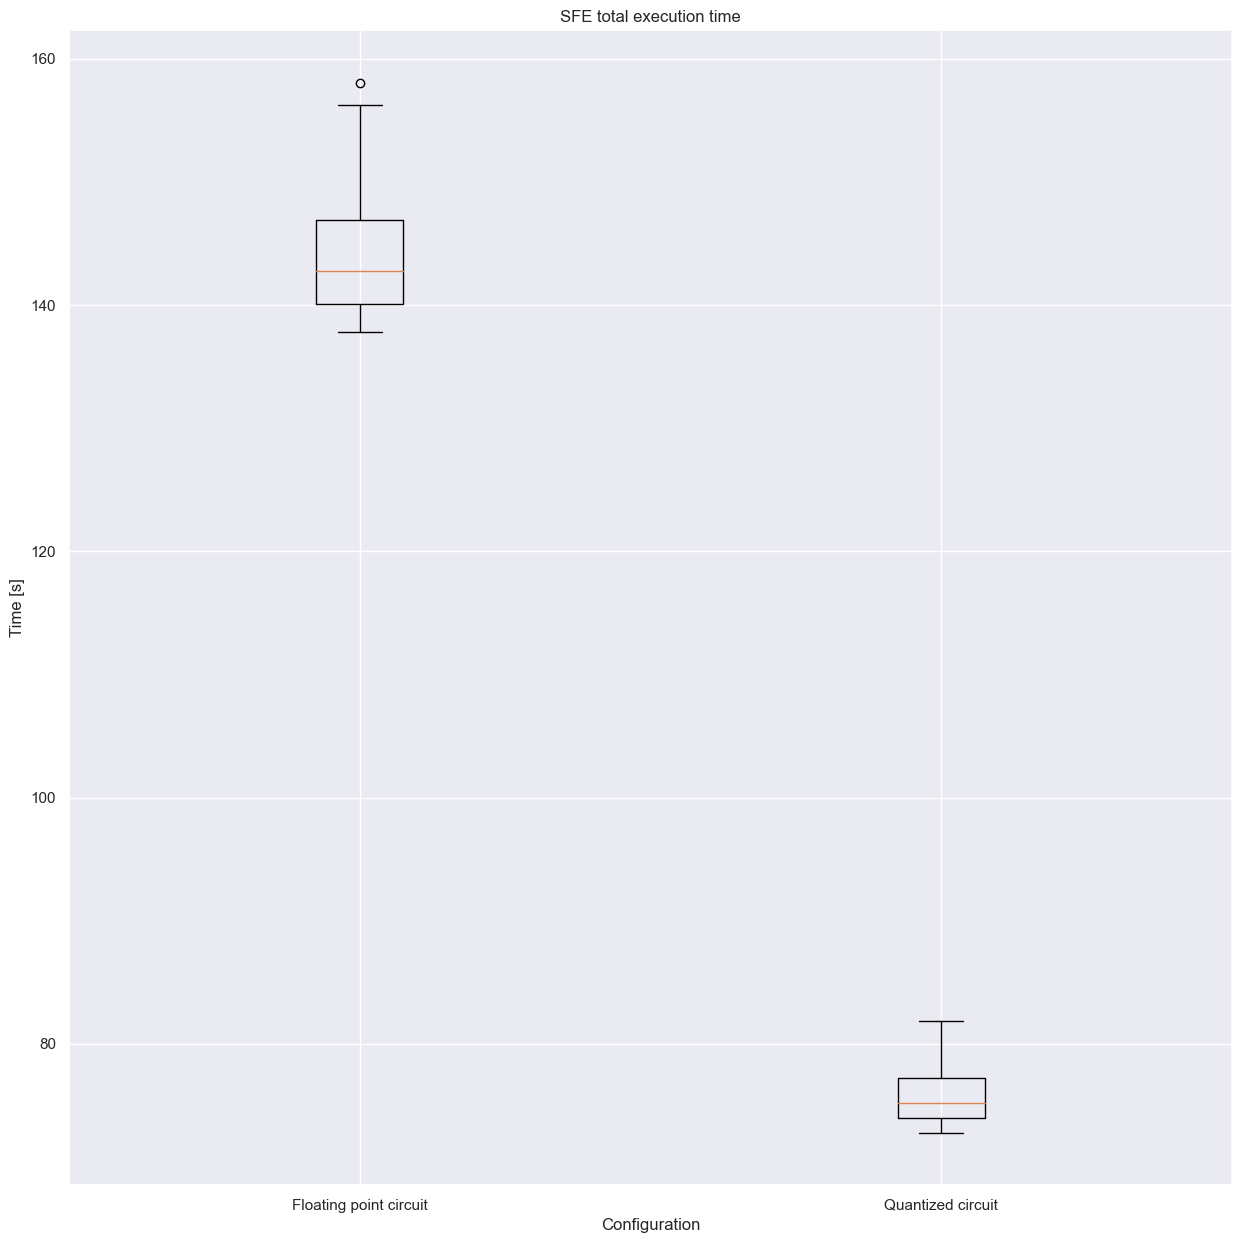

In [215]:
# plt.xticks(rotation=0)
l = [df_boolean['sfe_time'], df_arith['sfe_time']]
labels = ["Floating point circuit", "Quantized circuit"]
ax = plt.boxplot(l, labels=labels)
plt.title("SFE total execution time")
plt.ylabel("Time [s]")
plt.xlabel("Configuration")

In [216]:
# print mean of sfe time for both configurations
print("Mean sfe time for floating point circuit: ", df_boolean['sfe_time'].mean())
print("Mean sfe time for quantized circuit: ", df_arith['sfe_time'].mean())

Mean sfe time for floating point circuit:  144.00705930514212
Mean sfe time for quantized circuit:  75.78096277897174


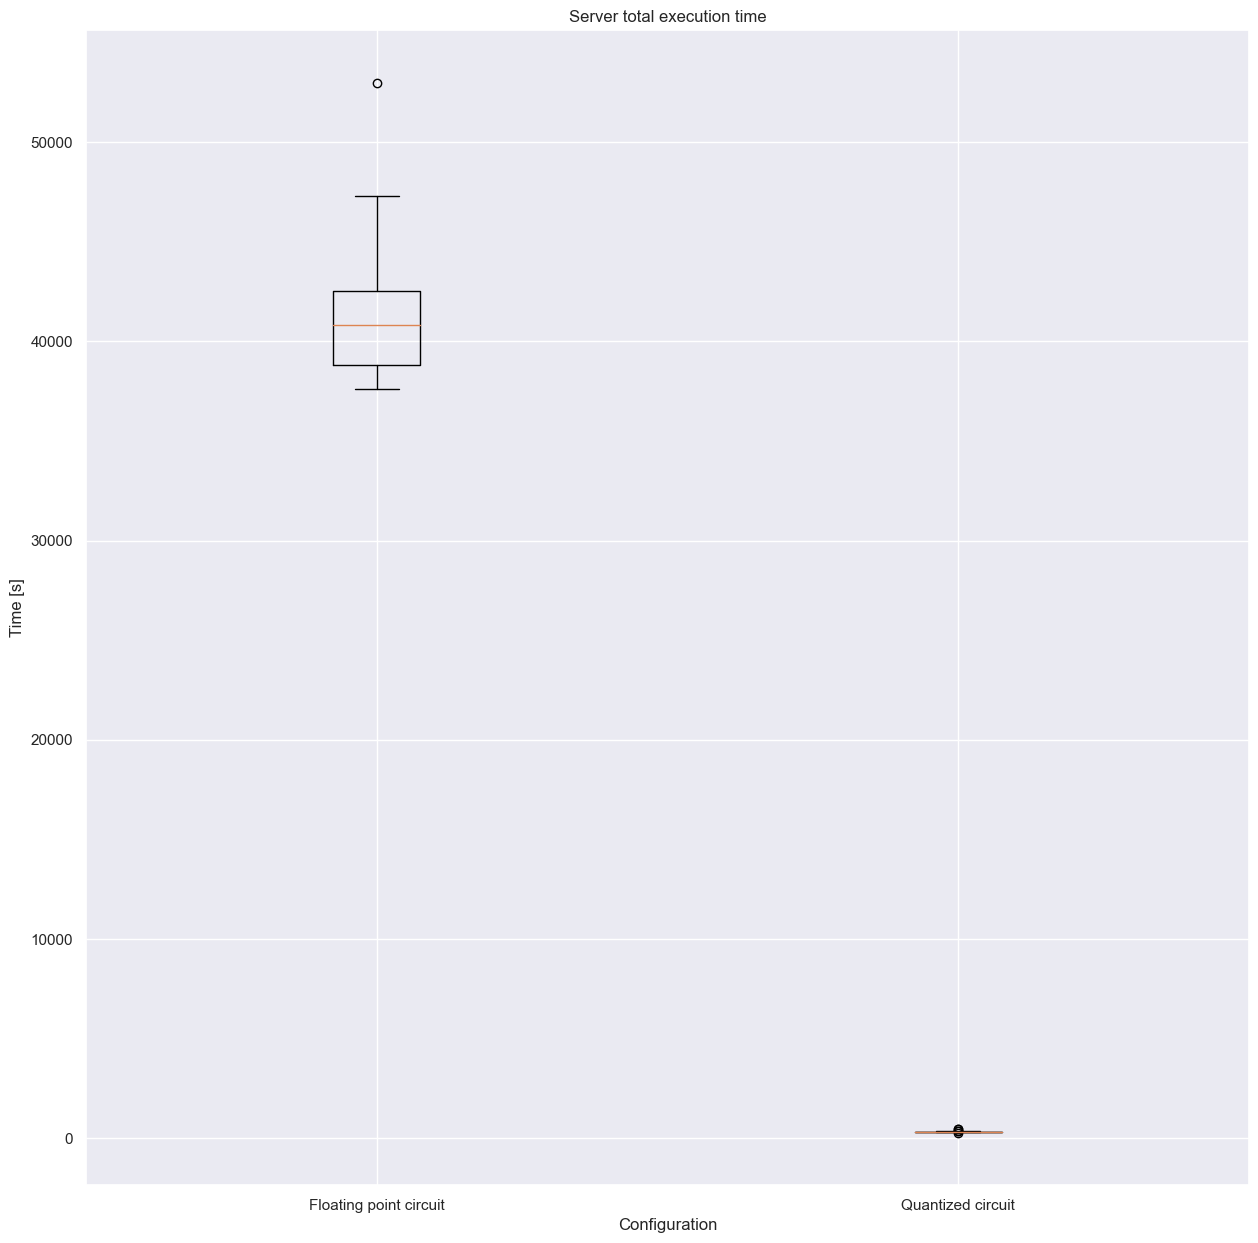

In [217]:
df_boolean.head()
l = [df_boolean['server.timings.total'], df_arith['server.timings.total']]
labels = ["Floating point circuit", "Quantized circuit"]
ax = plt.boxplot(l, labels=labels)
plt.title("Server total execution time")
plt.ylabel("Time [s]")
plt.xlabel("Configuration")
plt.show()

Text(0.5, 0, 'Configuration')

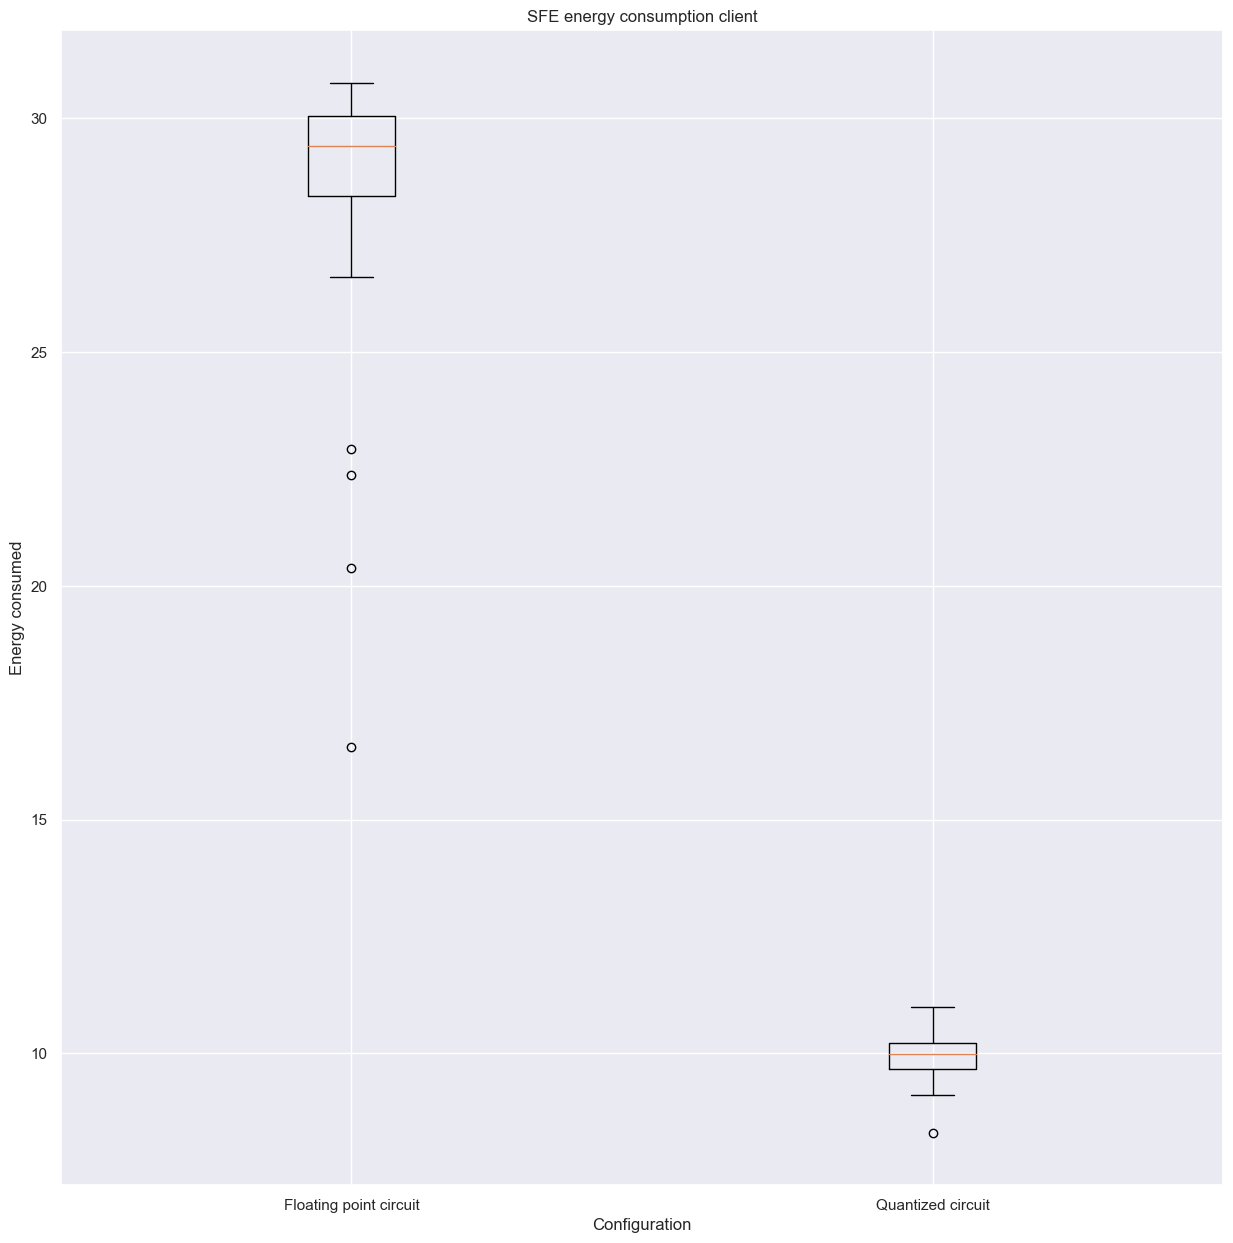

In [218]:
# plot the energy client from boolean and arithmetic dataframes with legenda
l = [df_boolean['energy_client'], df_arith['energy_client']]
labels = ["Floating point circuit", "Quantized circuit"]
ax = plt.boxplot(l, labels=labels)
plt.title("SFE energy consumption client")
plt.ylabel("Energy consumed")
plt.xlabel("Configuration")

Text(0.5, 0, 'Configuration')

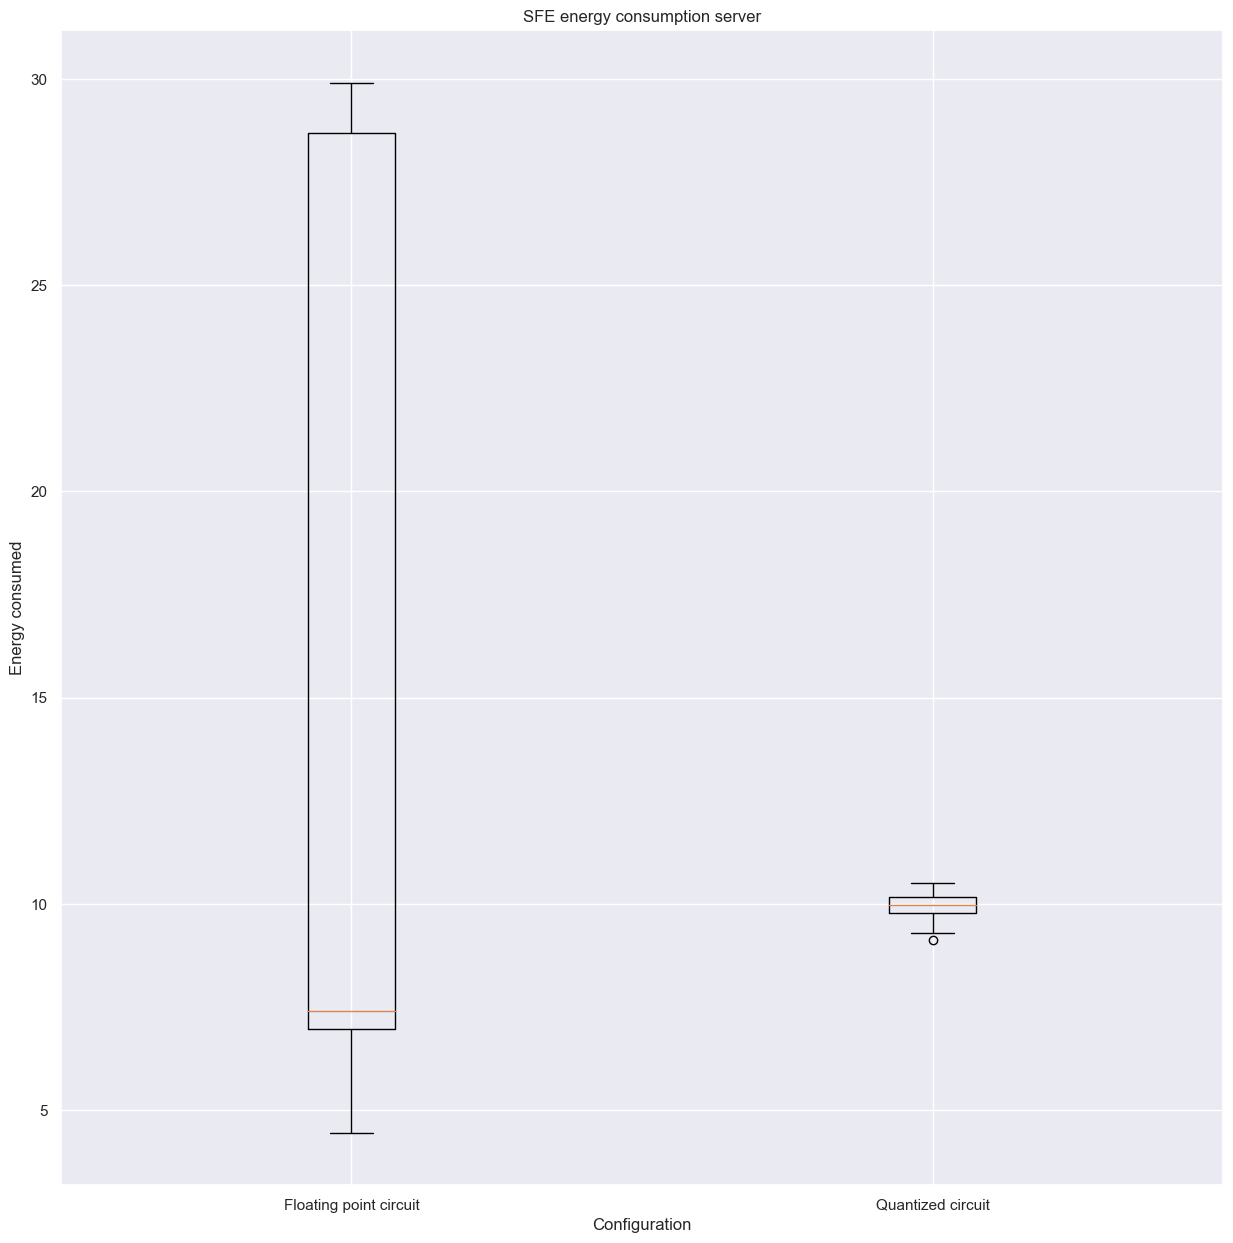

In [219]:
# plot the energy client from boolean and arithmetic dataframes with legenda
l = [df_boolean['energy_server'], df_arith['energy_server']]
labels = ["Floating point circuit", "Quantized circuit"]
ax = plt.boxplot(l, labels=labels)
plt.title("SFE energy consumption server")
plt.ylabel("Energy consumed")
plt.xlabel("Configuration")

In [220]:
# print summary of column in dataframe
difference = df_boolean['share_bytes_online_phase_client'].max() - df_boolean['share_bytes_online_phase_client'].min()
print("Difference between max and min: ", difference)

difference = df_arith['share_bytes_online_phase_client'].max() - df_arith['share_bytes_online_phase_client'].min()
print("Difference between max and min: ", difference)

Difference between max and min:  45
Difference between max and min:  86


Text(0.5, 0, 'Configuration')

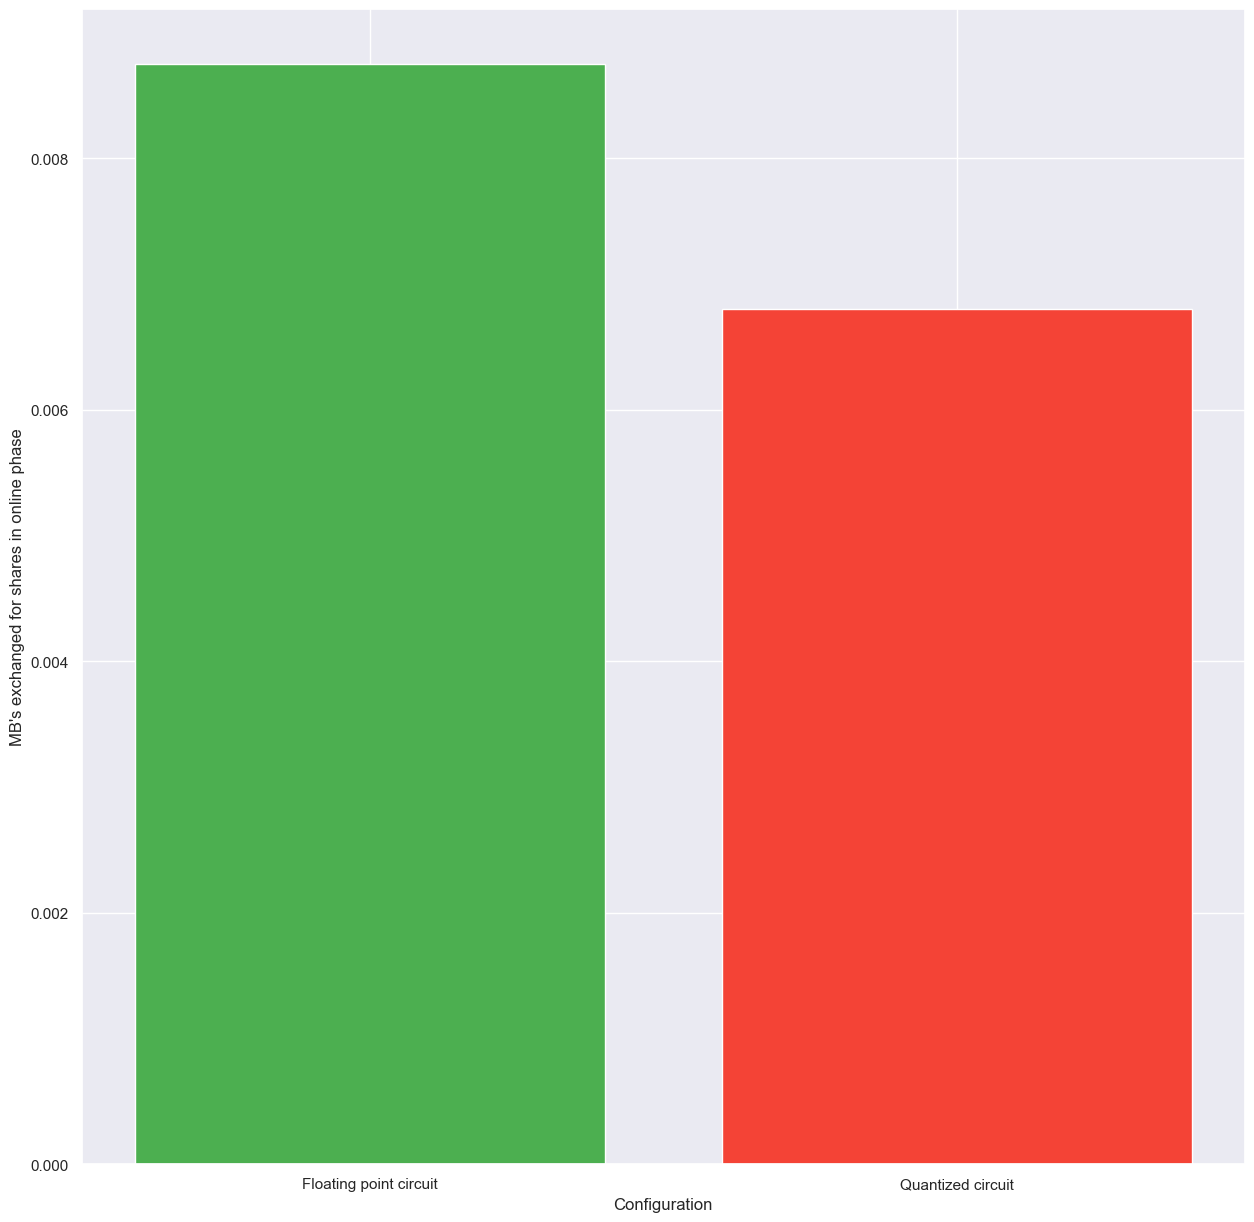

In [221]:
mean_share_bool = df_boolean['share_bytes_online_phase_client'].mean() / 1000000
mean_share_arith = df_arith['share_bytes_online_phase_client'].mean() / 1000000
labels = ["Floating point circuit", "Quantized circuit"]
plt.bar(labels, [mean_share_bool, mean_share_arith], color=['#4CAF50', '#F44336'])
plt.ylabel("MB's exchanged for shares in online phase")
plt.xlabel("Configuration")

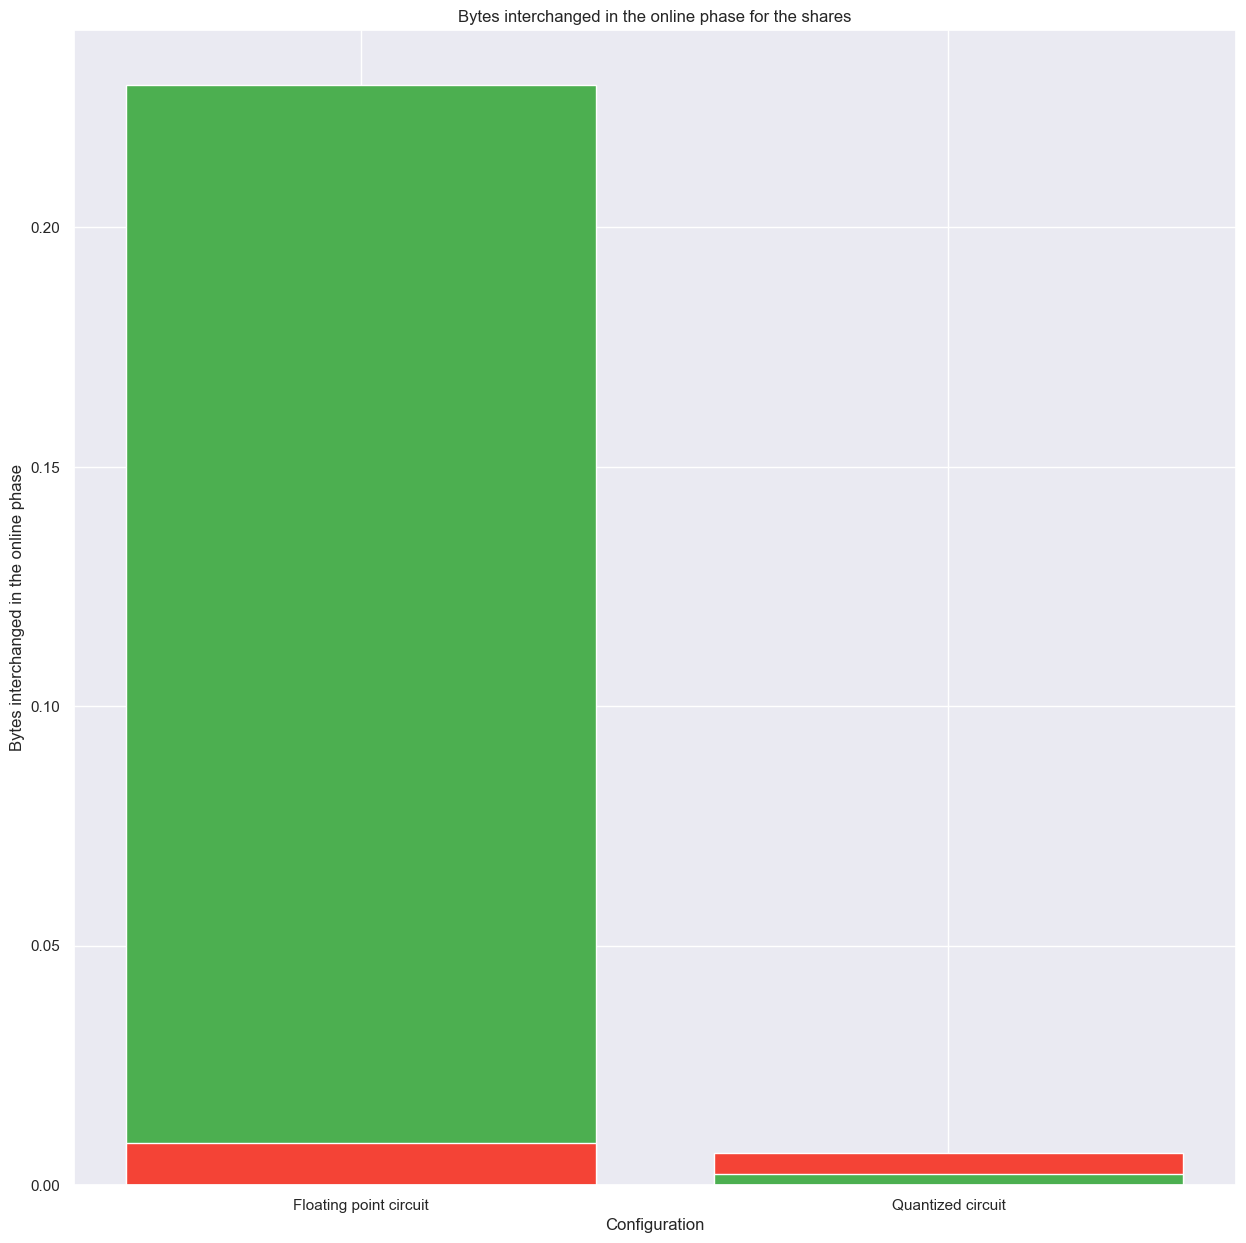

In [222]:
labels = ["Floating point circuit", "Quantized circuit", "Floating point circuit", "Quantized circuit"]
# grab the mean for the server communication
mean_bool = df_boolean['server.communication.online.sent'].mean() /1000000
mean_arith = df_arith['server.communication.online.sent'].mean() / 1000000
mean_share_bool = df_boolean['share_bytes_online_phase_client'].mean() / 1000000
mean_share_arith = df_arith['share_bytes_online_phase_client'].mean() /1000000
# print the means in a bar plot
#plt.bar(labels, [mean_bool, mean_arith, mean_share_bool, mean_share_arith])
# how to plot with different colors
plt.bar(labels, [mean_bool, mean_share_arith, mean_share_bool, mean_arith], color=['#4CAF50', '#F44336', '#F44336', '#4CAF50'])
plt.title("Bytes interchanged in the online phase for the shares")
plt.ylabel("Bytes interchanged in the online phase")
plt.xlabel("Configuration")
plt.show()